In [1]:
import pandas as pd

In [33]:
loan=pd.read_csv('loan.csv',sep=';')

In [34]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [9]:
loan_unique=loan['account_id'].value_counts()

In [10]:
loan.shape

(682, 7)

In [11]:
loan_unique.shape

(682,)

In [14]:
trans=pd.read_csv("trans_mod.csv")

In [15]:
trans.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month
0,2378,credit,credit in cash,700.0,700.0,NaN,NaN,NaN,01-01-1993,Jan-93
1,576,credit,credit in cash,900.0,900.0,NaN,NaN,NaN,01-01-1993,Jan-93
2,704,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN,01-01-1993,Jan-93
3,3818,credit,credit in cash,600.0,600.0,NaN,NaN,NaN,01-01-1993,Jan-93
4,1972,credit,credit in cash,400.0,400.0,NaN,NaN,NaN,02-01-1993,Jan-93


In [19]:
trans1=trans.copy()

In [36]:
loan['add']='19'
loan['Loan_date']=loan['add']+loan['date'].map(str)
loan['Loan_date'] =  pd.to_datetime(loan['Loan_date'], format='%Y%m%d')
loan.drop('add', axis=1, inplace=True)
#loan['Loan_month']=loan['Loan_date'].str[3:]

In [37]:
loan.to_csv("loan_check.csv")

In [39]:
loan=pd.read_csv("loan_check.csv")

In [40]:
loan.head()

,Unnamed: 0,loan_id,account_id,date,amount,duration,payments,status,Loan_date
0,0,5314,1787,930705,96396,12,8033,B,05-07-1993
1,1,5316,1801,930711,165960,36,4610,A,11-07-1993
2,2,6863,9188,930728,127080,60,2118,A,28-07-1993
3,3,5325,1843,930803,105804,36,2939,A,03-08-1993
4,4,7240,11013,930906,274740,60,4579,A,06-09-1993


In [41]:
loan['Loan_month']=loan['Loan_date'].str[3:]

loan.head()

,Unnamed: 0,loan_id,account_id,date,amount,duration,payments,status,Loan_date,Loan_month
0,0,5314,1787,930705,96396,12,8033,B,05-07-1993,07-1993
1,1,5316,1801,930711,165960,36,4610,A,11-07-1993,07-1993
2,2,6863,9188,930728,127080,60,2118,A,28-07-1993,07-1993
3,3,5325,1843,930803,105804,36,2939,A,03-08-1993,08-1993
4,4,7240,11013,930906,274740,60,4579,A,06-09-1993,09-1993


In [43]:
loan.to_csv("loan_check.csv")

In [48]:
loan=pd.read_csv("loan_check.csv")

In [49]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status,Loan_date,Loan_month
0,5314,1787,930705,96396,12,8033,B,05-07-1993,Jul-93
1,5316,1801,930711,165960,36,4610,A,11-07-1993,Jul-93
2,6863,9188,930728,127080,60,2118,A,28-07-1993,Jul-93
3,5325,1843,930803,105804,36,2939,A,03-08-1993,Aug-93
4,7240,11013,930906,274740,60,4579,A,06-09-1993,Sep-93


In [59]:
loan_month= loan[['account_id','Loan_month']]

In [60]:
loan_month.head()

,account_id,Loan_month
0,1787,Jul-93
1,1801,Jul-93
2,9188,Jul-93
3,1843,Aug-93
4,11013,Sep-93


In [64]:
trans.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month
0,2378,credit,credit in cash,700.0,700.0,NaN,NaN,NaN,01-01-1993,Jan-93
1,576,credit,credit in cash,900.0,900.0,NaN,NaN,NaN,01-01-1993,Jan-93
2,704,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN,01-01-1993,Jan-93
3,3818,credit,credit in cash,600.0,600.0,NaN,NaN,NaN,01-01-1993,Jan-93
4,1972,credit,credit in cash,400.0,400.0,NaN,NaN,NaN,02-01-1993,Jan-93


In [76]:
trans_loanmonth= pd.merge(trans, loan_month, on='account_id', how='right')

In [77]:
trans_loanmonth.head()

,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month,Loan_month
0,5270,credit,credit in cash,800.0,800.0,NaN,NaN,NaN,13-01-1993,Jan-93,Nov-93
1,5270,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0,14-01-1993,Jan-93,Nov-93
2,5270,credit,NaN,110.2,45659.2,interest credited,NaN,NaN,31-01-1993,Jan-93,Nov-93
3,5270,debit,withdrawal in cash,9600.0,36059.2,NaN,NaN,NaN,12-02-1993,Feb-93,Nov-93
4,5270,credit,collection from another bank,44749.0,80808.2,NaN,IJ,80269753.0,14-02-1993,Feb-93,Nov-93


In [78]:
trans_loanmonth.shape

(190103, 11)

In [79]:
trans.shape

(1048575, 10)

In [80]:
loan.shape

(682, 9)

In [83]:
arr=trans_loanmonth['account_id'].unique()
len(arr)

682

In [84]:
trans_loanmonth.to_csv("OBJ2_trans_loanmonth.csv")

In [101]:
trans_loanmonth= pd.read_csv("OBJ2_trans_loanmonth.csv")

In [102]:
trans_loanmonth['mod_trans_month'] = pd.DatetimeIndex(trans_loanmonth['month'])
trans_loanmonth['mod_loan_month'] = pd.DatetimeIndex(trans_loanmonth['Loan_month'])

In [103]:
trans_loanmonth.head()

,Unnamed: 0,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month,Loan_month,mod_trans_month,mod_loan_month
0,0,5270,credit,credit in cash,800.0,800.0,NaN,NaN,NaN,13-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
1,1,5270,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0,14-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
2,2,5270,credit,NaN,110.2,45659.2,interest credited,NaN,NaN,31-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
3,3,5270,debit,withdrawal in cash,9600.0,36059.2,NaN,NaN,NaN,12-02-1993,Feb-93,Nov-93,1993-02-01,1993-11-01
4,4,5270,credit,collection from another bank,44749.0,80808.2,NaN,IJ,80269753.0,14-02-1993,Feb-93,Nov-93,1993-02-01,1993-11-01


In [104]:
trans_loanmonth_till_loan= trans_loanmonth [ trans_loanmonth['mod_trans_month'] < trans_loanmonth['mod_loan_month'] ]

In [105]:
trans_loanmonth_till_loan.shape

(52777, 14)

In [106]:
trans_loanmonth_till_loan.head()

,Unnamed: 0,account_id,type,mode of transaction,amount,balance,transaction_character,to_bank,account_partner,Date,month,Loan_month,mod_trans_month,mod_loan_month
0,0,5270,credit,credit in cash,800.0,800.0,NaN,NaN,NaN,13-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
1,1,5270,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0,14-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
2,2,5270,credit,NaN,110.2,45659.2,interest credited,NaN,NaN,31-01-1993,Jan-93,Nov-93,1993-01-01,1993-11-01
3,3,5270,debit,withdrawal in cash,9600.0,36059.2,NaN,NaN,NaN,12-02-1993,Feb-93,Nov-93,1993-02-01,1993-11-01
4,4,5270,credit,collection from another bank,44749.0,80808.2,NaN,IJ,80269753.0,14-02-1993,Feb-93,Nov-93,1993-02-01,1993-11-01


In [107]:
trans_loanmonth_till_loan.to_csv("OBJ2_trans_loanmonth_till_loan.csv")

In [381]:
OBJ2_trans_tillloan_average=pd.DataFrame()

In [382]:
trans_debit= trans_loanmonth_till_loan [trans_loanmonth_till_loan['type']=='debit']
trans_credit= trans_loanmonth_till_loan [trans_loanmonth_till_loan['type']=='credit']

In [383]:
OBJ2_debit_monthly_allaccounts= trans_debit.groupby(['account_id'])['amount'].mean()

In [384]:
OBJ2_debit_monthly_allaccounts.head()

account_id
2     6276.393750
19    6306.812121
25    8731.021622
37    5249.923077
38    3611.678571
Name: amount, dtype: float64

In [388]:
OBJ2_debit_monthly_allaccounts.to_csv("OBJ2_debit_avgovermonths_allaccounts.csv")

In [389]:
OBJ2_credit_monthly_allaccounts= trans_credit.groupby(['account_id'])['amount'].mean()
OBJ2_credit_monthly_allaccounts.to_csv("OBJ2_credit_avgovermonths_allaccounts.csv")

In [390]:
OBJ2_credit_monthly_allaccounts.head()

account_id
2     10394.786364
19     5100.913636
25    19787.319608
37    13979.996875
38     6217.271429
Name: amount, dtype: float64

In [391]:
OBJ2_debit_monthly_allaccounts.shape

(679,)

In [151]:
OBJ2_allaccounts_avgmonthly_balance= trans_loanmonth_till_loan.groupby(['account_id'])['balance'].mean()

In [152]:
OBJ2_allaccounts_avgmonthly_balance.head()

account_id
2     32590.624074
19    25717.966234
25    63371.688889
37    40543.389091
38    31221.785714
Name: balance, dtype: float64

In [153]:
OBJ2_allaccounts_avgmonthly_balance.shape

(682,)

In [155]:
OBJ2_allaccounts_avgmonthly_balance.to_csv("OBJ2_balance_avgovermonths_allaccounts.csv")

In [175]:
trans_loanmonth_till_loan['transaction_character'].unique()

array([nan, 'interest credited', 'payment for statement', ' ', 'household',
       'insurance payment', 'sanction interest if negative balance'], dtype=object)

In [180]:
trans_others= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character'].isnull()]
OBJ2_allaccounts_avgmonthly_others = trans_others.groupby(['account_id'])['amount'].mean()

In [181]:
trans_interestcred= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character']=='interest credited']
OBJ2_allaccounts_avgmonthly_interestcred = trans_interestcred.groupby(['account_id'])['amount'].mean()

In [182]:
trans_household= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character']=='household']
OBJ2_allaccounts_avgmonthly_household = trans_household.groupby(['account_id'])['amount'].mean()

In [183]:
trans_statementpayment= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character']== 'payment for statement']
OBJ2_allaccounts_avgmonthly_statementpayment = trans_statementpayment.groupby(['account_id'])['amount'].mean()


In [184]:
trans_insurancepayment= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character']=='insurance payment']
OBJ2_allaccounts_avgmonthly_insurancepayment = trans_insurancepayment.groupby(['account_id'])['amount'].mean()

In [185]:
trans_negativebal= trans_loanmonth_till_loan [trans_loanmonth_till_loan['transaction_character']=='sanction interest if negative balance']
OBJ2_allaccounts_avgmonthly_trans_negativebal = trans_negativebal.groupby(['account_id'])['amount'].mean()

In [324]:
OBJ2_final_data= pd.read_csv("Final data_without_transactions.csv")

In [325]:
OBJ2_final_data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Year', 'Date', 'Month', 'Gender',
       'district name_x', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'district name_y', 'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',


In [326]:
OBJ2_final_data['add']='19'
OBJ2_final_data['Year']= OBJ2_final_data['add']+ OBJ2_final_data['Year'].map(str)
OBJ2_final_data['Client_bday'] = OBJ2_final_data['Year'].map(str)+OBJ2_final_data['Month'].map(str)+OBJ2_final_data['Date'].map(str)

#loan['Loan_date'] =  pd.to_datetime(loan['Loan_date'], format='%Y%m%d')

OBJ2_final_data['Client_bday'].head()

0    1947722
1    1968722
2     193662
3    1940420
4     197897
Name: Client_bday, dtype: object

In [327]:
OBJ2_final_data['Client_bday'] =  pd.to_datetime(OBJ2_final_data['Client_bday'], format='%Y%m%d')
OBJ2_final_data['Client_bday'].head()

0   1947-07-22
1   1968-07-22
2   1936-06-02
3   1940-04-20
4   1978-09-07
Name: Client_bday, dtype: datetime64[ns]

In [328]:
OBJ2_final_data.drop( ['add','Year','Month','Date','district name_x','district name_y'], axis=1, inplace=True)
OBJ2_final_data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Gender', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no

In [329]:
import datetime
from datetime import datetime
now=datetime.now()

In [330]:
OBJ2_final_data['today'] = pd.Timestamp('19990101')
OBJ2_final_data['Client_age']= (OBJ2_final_data['today'] - OBJ2_final_data['Client_bday']).dt.days

In [331]:
OBJ2_final_data['Client_age']= (OBJ2_final_data['Client_age']/365).map(int)                            

In [332]:
OBJ2_final_data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Gender', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no

In [333]:
OBJ2_final_data.drop( ['today','Client_bday'], axis=1, inplace=True)
OBJ2_final_data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Gender', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no

In [334]:
OBJ2_final_data['account_creation'].head()

0    930322
1    930213
2    930208
3    930130
4    930214
Name: account_creation, dtype: int64

In [335]:
OBJ2_final_data['add']='19'
OBJ2_final_data['account_creation']= OBJ2_final_data['add']+ OBJ2_final_data['account_creation'].map(str)
OBJ2_final_data['account_creation'] =  pd.to_datetime(OBJ2_final_data['account_creation'], format='%Y%m%d')

In [336]:
OBJ2_final_data['today'] = pd.Timestamp('19990101')
OBJ2_final_data['Account_age']= (OBJ2_final_data['today'] - OBJ2_final_data['account_creation']).dt.days
OBJ2_final_data['Account_age']= (OBJ2_final_data['Account_age']/365).map(int)  

In [364]:
OBJ2_final_data.columns

Index(['Unnamed: 0', 'loan_id', 'account_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'district_id_bank',
       'frequency_statements', 'account_creation', 'disp_id', 'client_id',
       'disp_type', 'card_id', 'card_type', 'card_issued',
       'district_id_client', 'Gender', 'region_x', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'region_y', 'no. of inhabitants_y',
       'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no

In [348]:
OBJ2_final_data.to_csv("OBJ2_final_data.csv")

In [365]:
#OBJ2_final_data['add']='19'
OBJ2_final_data.drop(['loan_id','loan_date','district_id_bank','disp_id','client_id','card_id','card_issued','district_id_client','region_x','region_y','add','today'], axis=1, inplace=True)

In [367]:
OBJ2_final_data.columns

Index(['Unnamed: 0', 'account_id', 'loan_amount', 'duration', 'payments',
       'status', 'frequency_statements', 'account_creation', 'disp_type',
       'card_type', 'Gender', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
       'ratio of urban inhabitant

In [368]:
OBJ2_final_data.to_csv("OBJ2_final_data.csv")

In [ ]:
#MERGING TO CREATE FINAL DATA

In [369]:
print(
OBJ2_debit_monthly_allaccounts.shape,
OBJ2_credit_monthly_allaccounts.shape,
OBJ2_allaccounts_avgmonthly_balance.shape,
OBJ2_allaccounts_avgmonthly_others.shape,
OBJ2_allaccounts_avgmonthly_interestcred.shape,
OBJ2_allaccounts_avgmonthly_household.shape,
OBJ2_allaccounts_avgmonthly_statementpayment.shape,
OBJ2_allaccounts_avgmonthly_insurancepayment.shape,
OBJ2_allaccounts_avgmonthly_trans_negativebal.shape, )
print(OBJ2_final_data.shape)

(679,) (682,) (682,) (682,) (679,) (409,) (619,) (104,) (29,)
(827, 39)


In [396]:
merge1=pd.concat([OBJ2_credit_monthly_allaccounts, OBJ2_debit_monthly_allaccounts,
                  OBJ2_allaccounts_avgmonthly_balance,
OBJ2_allaccounts_avgmonthly_others,
OBJ2_allaccounts_avgmonthly_interestcred,
OBJ2_allaccounts_avgmonthly_household,
OBJ2_allaccounts_avgmonthly_statementpayment,
OBJ2_allaccounts_avgmonthly_insurancepayment,
OBJ2_allaccounts_avgmonthly_trans_negativebal], axis=1)

In [398]:
merge1.to_csv("OBJ2_merge1.csv")

In [399]:
merge1=pd.read_csv("OBJ2_merge1.csv")

In [400]:
merge1.head()

,account_id,credit amount,debit amount,balance,avgmonthly_other expenses,avgmonthly_interest,avgmonthly_household,avgmonthly_statement,avgmonthly_insurance,avgmonthly_negbal
0,2,10394.786360,6276.393750,32590.62407,11873.424240,128.930000,7266.0,14.6,NaN,NaN
1,19,5100.913636,6306.812121,25717.96623,8431.947368,118.091667,15600.0,14.6,NaN,NaN
2,25,19787.319610,8731.021622,63371.68889,20447.626370,272.286667,6817.0,14.6,164.0,NaN
3,37,13979.996870,5249.923077,40543.38909,15674.745100,164.492857,2317.0,14.6,97.0,0.4
4,38,6217.271429,3611.678571,31221.78571,7709.074074,139.212500,6901.0,30.0,228.0,NaN


In [401]:
OBJ2_model_data= pd.merge(OBJ2_final_data, merge1, on='account_id', how='left')

In [404]:
OBJ2_model_data.head()

,Unnamed: 0,account_id,loan_amount,duration,payments,status,frequency_statements,account_creation,disp_type,card_type,...,Account_age,credit amount,debit amount,balance,avgmonthly_other expenses,avgmonthly_interest,avgmonthly_household,avgmonthly_statement,avgmonthly_insurance,avgmonthly_negbal
0,0,1787,96396,12,8033.0,B,POPLATEK TYDNE,1993-03-22,OWNER,NaN,...,5,5025.000000,NaN,12250.00000,5025.000000,NaN,NaN,NaN,NaN,NaN
1,1,1801,165960,36,4610.0,A,POPLATEK MESICNE,1993-02-13,OWNER,NaN,...,5,12545.168750,9628.322222,52729.67941,17803.100000,168.540000,4167.0,14.6,956.0,NaN
2,2,9188,127080,60,2118.0,A,POPLATEK MESICNE,1993-02-08,OWNER,NaN,...,5,4459.714286,9133.333333,27372.42941,9899.444444,92.625000,NaN,NaN,NaN,NaN
3,3,1843,105804,36,2939.0,A,POPLATEK MESICNE,1993-01-30,OWNER,classic,...,5,9254.600000,7168.100000,41297.48000,11969.250000,160.360000,6994.0,14.6,NaN,NaN
4,4,11013,274740,60,4579.0,A,POPLATEK TYDNE,1993-02-14,OWNER,junior,...,5,21255.930770,16801.000000,57188.21111,30661.625000,190.183333,756.0,30.0,NaN,NaN


In [415]:
work=pd.read_csv("Final data_without_transactions.csv")
work.columns
credit_issue= work[['account_id','card_issued']]

In [417]:
OBJ2_model_data.to_csv("OBJ2_final_model_data.csv")

In [474]:
OBJ2_model_finaldata=pd.read_csv("OBJ2_final_model_data.csv")

In [475]:
OBJ2_model_finaldata.columns

Index(['loan_amount', 'duration', 'payments', 'status', 'frequency_statements',
       'disp_type', 'card_type', 'Gender', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
       'ratio of urban inhabitants_y', 'average salary_y',
       'unemployment rate 95_

In [491]:
OBJ2_model_finaldata.loc [ (OBJ2_model_finaldata['status']=='A'), 'status' ]=0
OBJ2_model_finaldata.loc [ (OBJ2_model_finaldata['status']=='B'), 'status' ]=1
OBJ2_model_finaldata.loc [ (OBJ2_model_finaldata['status']=='C'), 'status' ]=0
OBJ2_model_finaldata.loc [ (OBJ2_model_finaldata['status']=='D'), 'status' ]=1

In [492]:
OBJ2_model_finaldata_dummied= pd.get_dummies(data=OBJ2_model_finaldata, columns=['frequency_statements','disp_type','card_type','Gender'])

In [493]:
OBJ2_model_finaldata_dummied.columns

Index(['loan_amount', 'duration', 'payments', 'status', 'no. of inhabitants_x',
       'no_of_municipalities_inhabitants < 499_x',
       'no. of municipalities with inhabitants 500-1999_x',
       'no. of municipalities with inhabitants 2000-9999_x',
       'no. of municipalities with inhabitants >10000_x', 'no. of cities_x',
       'ratio of urban inhabitants_x', 'average salary_x',
       'unemployment rate 95_x', 'unemployment rate 96_x',
       'no. of entrepreneurs per 1000 inhabitants_x',
       'no. of committed crimes 95_x', 'no. of committed crimes 96_x',
       'no. of inhabitants_y', 'no_of_municipalities_inhabitants < 499_y',
       'no. of municipalities with inhabitants 500-1999_y',
       'no. of municipalities with inhabitants 2000-9999_y',
       'no. of municipalities with inhabitants >10000_y', 'no. of cities_y',
       'ratio of urban inhabitants_y', 'average salary_y',
       'unemployment rate 95_y', 'unemployment rate 96_y',
       'no. of entrepreneurs per 1000

In [494]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [495]:
OBJ2_model_finaldata_dummied['status']= OBJ2_model_finaldata_dummied['status'].astype('category')
# OBJ2_model_finaldata_dummied['unemployment rate 95_x'].astype('float')
# OBJ2_model_finaldata_dummied['no. of committed crimes 95_x'].astype('float')
# OBJ2_model_finaldata_dummied['unemployment rate 95_y'].astype('float')
# OBJ2_model_finaldata_dummied['no. of committed crimes 95_y'].astype('float')

In [522]:
OBJ2_model_finaldata_dummied['debit amount'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['debit amount'].isnull().values.any()

False

In [529]:


OBJ2_model_finaldata_dummied['avgmonthly_other expenses'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['avgmonthly_interest'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['avgmonthly_household'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['avgmonthly_statement'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['avgmonthly_insurance'].fillna(0, inplace=True)
OBJ2_model_finaldata_dummied['avgmonthly_negbal'].fillna(0, inplace=True)

OBJ2_model_finaldata_dummied.isnull().values.any()



False

In [531]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

In [541]:
# y= OBJ2_model_finaldata_dummied['status']

In [542]:
# random_state = np.random.RandomState(0)
# clf = RandomForestClassifier(random_state=random_state)
# clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)

In [613]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support) 

In [614]:
X = OBJ2_model_finaldata_dummied.loc[:, OBJ2_model_finaldata_dummied.columns != 'status']
y = OBJ2_model_finaldata_dummied.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

random_state = np.random.RandomState(0)
clf= RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.926829268293


In [615]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [618]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  0.926829268293
precision:  0.666666666667
recall:  0.153846153846
f1:  0.25
area under curve (auc):  0.573611818645
Confusion matrix [[150   1]
 [ 11   2]]


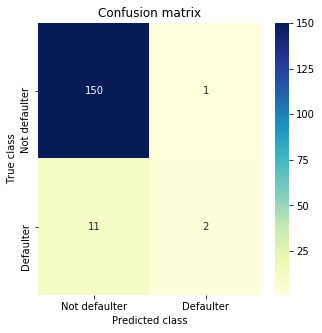

In [620]:
 #Plotting Confusion Matrix
    
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
#plt.savefig("C:/Users/ann.maryvarghese/Desktop/ann_results/final/minmax_sig_ConfusionMatrix_oversampling_"+str(nb_epoch)+"_"+str(batch_size)+".png")
plt.show() 


In [621]:
OBJ2_model_finaldata_dummied['status'].value_counts()

0    744
1     74
Name: status, dtype: int64

In [622]:
#SMOT!

X = OBJ2_model_finaldata_dummied.loc[:, OBJ2_model_finaldata_dummied.columns != 'status']
#print(X.columns)
y = OBJ2_model_finaldata_dummied.loc[:,'status']

import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smot, y_smot = sm.fit_sample(X, y)
print("no of rows in data", len(X_smot))
print("no of minority class", y_smot.sum())

no of rows in data 1488
no of minority class 744


In [623]:
smot_df=pd.DataFrame(X_smot, columns = OBJ2_model_finaldata_dummied.drop('status',axis=1).columns)
smot_df['status'] = y_smot
smot_df.shape

(1488, 51)

In [624]:
smot_df_X = smot_df.loc[:, smot_df.columns != 'status']
y = smot_df.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(smot_df_X, y, test_size=0.2)

random_state = np.random.RandomState(0)
clf= RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.953020134228


In [625]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  0.953020134228
precision:  0.985815602837
recall:  0.920529801325
f1:  0.952054794521
area under curve (auc):  0.953462179574
Confusion matrix [[145   2]
 [ 12 139]]


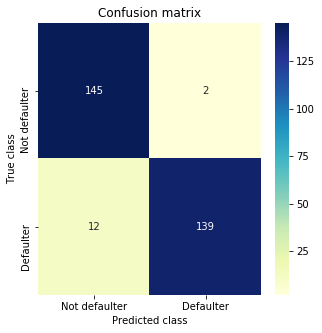

In [626]:
 #Plotting Confusion Matrix
    
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show() 


In [627]:
clf.feature_importances_

array([ 0.05082828,  0.01001822,  0.06920483,  0.00585747,  0.00698297,
        0.00645351,  0.00581505,  0.01222441,  0.0254438 ,  0.00965388,
        0.01188489,  0.00897566,  0.0164117 ,  0.01521996,  0.0064943 ,
        0.01090914,  0.01064394,  0.01042455,  0.00471254,  0.01082004,
        0.01009387,  0.03107016,  0.00908921,  0.00871013,  0.00500776,
        0.01228744,  0.0069748 ,  0.00888139,  0.00799602,  0.01659851,
        0.05395903,  0.03378474,  0.03881579,  0.02132482,  0.0229576 ,
        0.08639748,  0.01801746,  0.040273  ,  0.00148126,  0.10563356,
        0.01961191,  0.00109051,  0.00158237,  0.00033782,  0.03932538,
        0.03239093,  0.00027789,  0.00028158,  0.02005003,  0.03671841])

In [628]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [629]:
#clf.fit(X_train, y_train)
features=X_train.columns

In [631]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

count=0
OBJ2_feature_df= pd.DataFrame()

for f in range(X_train.shape[1]):
    if(count<10):
        OBJ2_feature_df = OBJ2_feature_df.append({'Feature' : features[f+1] , 'Feature_no' : indices[f], 'Importance':importances[indices[f]]} , ignore_index=True)
        print( (features[f+1], indices[f], importances[indices[f]]))
        count+=1

print(OBJ2_feature_df)

OBJ2_feature_df.to_csv("OBJ2_feature_df.csv")

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlim([-1, X_train.shape[1]])
# # plt.savefig("OBJ2_featureimportance.png")
# plt.show()


Feature ranking:
('duration', 39, 0.10563355560331655)
('payments', 35, 0.086397479232556584)
('no. of inhabitants_x', 2, 0.069204833456756459)
('no_of_municipalities_inhabitants < 499_x', 30, 0.053959032581792299)
('no. of municipalities with inhabitants 500-1999_x', 0, 0.050828280190995181)
('no. of municipalities with inhabitants 2000-9999_x', 37, 0.040272997096517452)
('no. of municipalities with inhabitants >10000_x', 44, 0.03932538216043624)
('no. of cities_x', 32, 0.038815793508804194)
('ratio of urban inhabitants_x', 49, 0.036718412563486333)
('average salary_x', 31, 0.033784738692216522)
                                             Feature  Feature_no  Importance
0                                           duration        39.0    0.105634
1                                           payments        35.0    0.086397
2                               no. of inhabitants_x         2.0    0.069205
3           no_of_municipalities_inhabitants < 499_x        30.0    0.053959
4  no. of m

In [632]:
#BASIC_LR

from sklearn.linear_model import LogisticRegression

random_state = np.random.RandomState(1)
clf= LogisticRegression()
clf.fit(X_train, y_train)
# cv = StratifiedKFold(n_splits=5,shuffle=False)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.788590604027


In [633]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))  
print("precision: ", metrics.precision_score(y_test, y_pred))  
print("recall: ", metrics.recall_score(y_test, y_pred))  
print("f1: ", metrics.f1_score(y_test, y_pred))  
print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred))  
print("Confusion matrix",conf_matrix) 

accuracy:  0.788590604027
precision:  0.789473684211
recall:  0.794701986755
f1:  0.792079207921
area under curve (auc):  0.788507455963
Confusion matrix [[115  32]
 [ 31 120]]


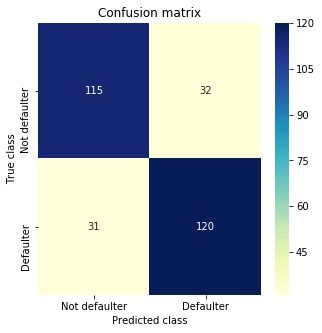

In [634]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

LABELS = ["Not defaulter", "Defaulter"]
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show() 